In [1]:
# import packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# read imputed data filev - x.csv
dfx = pd.read_csv('../csv_files/x.csv', index_col=0)
dfx.head()

,C1,C3,C4,C5,C6,C7,T1,T2,T3,T4,T5,S1,S2,S3,C3p,C5p,C2
0,122.0,3.43,0.029074,40962052.0,10600000.0,51.345,470.0,12719.0,11560.0,301.0,690.0,62.0,117.0,139.0,0,3.864345,1.0
1,259.0,-1.62,-0.013352,28869196.0,2400000.0,25.936,791.0,21792.0,19585.0,510.0,1120.0,71.0,242.0,237.0,1,12.028832,0.0
2,90.0,-1.24,0.020715,16845668.0,5000000.0,7.378,201.0,5262.0,4785.0,128.0,325.0,61.0,33.0,60.0,1,3.369134,1.0
3,209.0,-0.91,0.020023,14848637.0,4500000.0,8.526,328.0,8259.0,7574.0,177.0,509.0,80.0,59.0,110.0,1,3.299697,1.0
4,80.0,0.07,-0.034895,30741716.0,8250000.0,632.298,572.0,14830.0,13176.0,336.0,720.0,67.0,149.0,167.0,0,3.726269,1.0


In [3]:
# create separate dataframe for C2 and C3p as we do not need to change any outliers because it is a binary variable
# will concat this df with dfx dataframe later 
dfbinary = dfx.filter(['C2', 'C3p'])
dfbinary.head()

,C2,C3p
0,1.0,0
1,0.0,1
2,1.0,1
3,1.0,1
4,1.0,0


In [4]:
# drop C2 and C3p variable from working dfx dataframe
dfx = dfx.drop(labels=['C2', 'C3p'], axis=1)
dfx.head()

,C1,C3,C4,C5,C6,C7,T1,T2,T3,T4,T5,S1,S2,S3,C5p
0,122.0,3.43,0.029074,40962052.0,10600000.0,51.345,470.0,12719.0,11560.0,301.0,690.0,62.0,117.0,139.0,3.864345
1,259.0,-1.62,-0.013352,28869196.0,2400000.0,25.936,791.0,21792.0,19585.0,510.0,1120.0,71.0,242.0,237.0,12.028832
2,90.0,-1.24,0.020715,16845668.0,5000000.0,7.378,201.0,5262.0,4785.0,128.0,325.0,61.0,33.0,60.0,3.369134
3,209.0,-0.91,0.020023,14848637.0,4500000.0,8.526,328.0,8259.0,7574.0,177.0,509.0,80.0,59.0,110.0,3.299697
4,80.0,0.07,-0.034895,30741716.0,8250000.0,632.298,572.0,14830.0,13176.0,336.0,720.0,67.0,149.0,167.0,3.726269


In [5]:
# finding IQR for each column
Q1 = dfx.quantile(0.25)
Q3 = dfx.quantile(0.75)
IQR = Q3 - Q1
print(IQR)

C1     6.775000e+01
C3     1.190000e+00
C4     4.429223e-02
C5     3.061682e+07
C6     6.930076e+06
C7     2.482465e+02
T1     1.995000e+02
T2     6.044500e+03
T3     5.583500e+03
T4     1.405000e+02
T5     3.322500e+02
S1     3.975000e+01
S2     6.875000e+01
S3     7.300000e+01
C5p    2.011641e+00
dtype: float64


In [6]:
# print out Q1 and Q3 values for each variable 
print('Q1 Values')
print(Q1)
print('Q3 Values')
print(Q3)

Q1 Values
C1     8.500000e+01
C3    -7.500000e-01
C4    -1.335164e-02
C5     1.874682e+07
C6     5.004180e+06
C7     4.151150e+01
T1     3.512500e+02
T2     9.195750e+03
T3     8.168000e+03
T4     2.132500e+02
T5     4.622500e+02
S1     4.500000e+01
S2     7.300000e+01
S3     1.000000e+02
C5p    2.853439e+00
Name: 0.25, dtype: float64
Q3 Values
C1     1.527500e+02
C3     4.400000e-01
C4     3.094059e-02
C5     4.936364e+07
C6     1.193426e+07
C7     2.897580e+02
T1     5.507500e+02
T2     1.524025e+04
T3     1.375150e+04
T4     3.537500e+02
T5     7.945000e+02
S1     8.475000e+01
S2     1.417500e+02
S3     1.730000e+02
C5p    4.865080e+00
Name: 0.75, dtype: float64


In [7]:
# identifying outlier value locations sort of 
# Q1 - 1.5 * IQR = lower bound 
# Q3 + 1.5 * IQR = upper bound 

# define upper bound
upper = Q3 + 1.5 * IQR
# define lower bound 
lower = Q1 - 1.5 * IQR
# define outlier variable 
# below is equivalent to this formula: outlier = (dfx < (Q1 - 1.5 * IQR)) | (dfx > (Q3 + 1.5 * IQR))
outlier = (dfx < lower) | (dfx > upper)

# print out the results
# gives the location of the outlier values (indicated by True) based on the bounds defined above 
print(outlier)

        C1     C3     C4     C5     C6     C7     T1     T2     T3     T4  \
0    False   True  False  False  False  False  False  False  False  False   
1     True  False  False  False  False  False  False  False  False  False   
2    False  False  False  False  False  False  False  False  False  False   
3    False  False  False  False  False  False  False  False  False  False   
4    False  False  False  False  False  False  False  False  False  False   
5    False  False  False  False  False  False  False  False  False  False   
6    False  False  False  False  False  False  False  False  False  False   
7    False  False  False  False  False  False  False  False  False  False   
8    False  False  False  False  False  False  False  False  False  False   
9    False  False  False  False  False  False  False  False  False  False   
10   False  False  False  False  False  False  False  False  False  False   
11   False   True  False  False  False  False  False  False  False  False   

In [8]:
# print the upper bound value for each variable
print(upper)

C1     2.543750e+02
C3     2.225000e+00
C4     9.737893e-02
C5     9.528888e+07
C6     2.232937e+07
C7     6.621277e+02
T1     8.500000e+02
T2     2.430700e+04
T3     2.212675e+04
T4     5.645000e+02
T5     1.292875e+03
S1     1.443750e+02
S2     2.448750e+02
S3     2.825000e+02
C5p    7.882541e+00
dtype: float64


In [9]:
# print the lower bound for each variable 
print(lower)

C1    -1.662500e+01
C3    -2.535000e+00
C4    -7.978998e-02
C5    -2.717841e+07
C6    -5.390933e+06
C7    -3.308582e+02
T1     5.200000e+01
T2     1.290000e+02
T3    -2.072500e+02
T4     2.500000e+00
T5    -3.612500e+01
S1    -1.462500e+01
S2    -3.012500e+01
S3    -9.500000e+00
C5p   -1.640217e-01
dtype: float64


In [10]:
# define upper and lower lists
upper = []
lower = []

# create for loop that will iterate over each value in every column
for i in dfx.columns:
    # define Q1 and Q3 for each column
    Q1 = dfx[i].quantile(0.25)
    Q3 = dfx[i].quantile(0.75)
    # define IQR for each column
    IQR = Q3 - Q1
    # append empty lists upper and lower
    upper_list = Q3 + 1.5 * IQR
    upper.append(upper_list)
    lower_list = Q1 - 1.5 * IQR
    lower.append(lower_list)
    

In [11]:
# define the function that will replace outlier values in each column with the appropriate upper or lower limit 
def outlier_handling(x, upper, lower):
    if x > upper:
        x = upper
    elif x < lower:
            x = lower
    else:
        pass
    return x

In [12]:
# apply the outlier handling function to the dfx dataframe to replace the outlier values in each column
for col in dfx.columns:
    q1 = dfx.loc[:, col].quantile(0.25)
    q3 = dfx.loc[:, col].quantile(0.75)
    IQR = q3 - q1
    lbound = q1 - 1.5*IQR
    ubound = q3 + 1.5*IQR
    dfx.loc[:, col] = dfx.loc[:, col].apply(lambda x: outlier_handling(x, ubound,lbound))

### Check that the Outlier Handling function Worked
### Examine the boxplots for each variable (should see no outliers) 

{'whiskers': [<matplotlib.lines.Line2D at 0x7fdfb7b894a8>,
 'caps': [<matplotlib.lines.Line2D at 0x7fdfb7b89b38>,
 'boxes': [<matplotlib.lines.Line2D at 0x7fdfb7b89358>],
 'medians': [<matplotlib.lines.Line2D at 0x7fdfb7b1c208>],
 'fliers': [<matplotlib.lines.Line2D at 0x7fdfb7b1c550>],
 'means': []}

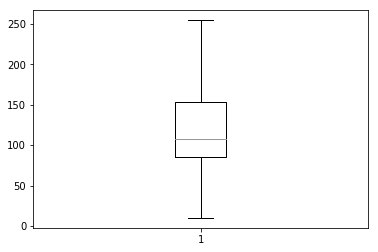

In [13]:
plt.boxplot(dfx['C1'])

{'whiskers': [<matplotlib.lines.Line2D at 0x7fdfb7b0bd68>,
 'caps': [<matplotlib.lines.Line2D at 0x7fdfb7a96438>,
 'boxes': [<matplotlib.lines.Line2D at 0x7fdfb7b0b9e8>],
 'medians': [<matplotlib.lines.Line2D at 0x7fdfb7a96ac8>],
 'fliers': [<matplotlib.lines.Line2D at 0x7fdfb7a96e10>],
 'means': []}

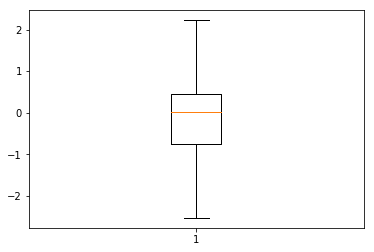

In [14]:
plt.boxplot(dfx['C3'])

{'whiskers': [<matplotlib.lines.Line2D at 0x7fdfb7a66fd0>,
 'caps': [<matplotlib.lines.Line2D at 0x7fdfb7a6e6a0>,
 'boxes': [<matplotlib.lines.Line2D at 0x7fdfb7a66e80>],
 'medians': [<matplotlib.lines.Line2D at 0x7fdfb7a6ed30>],
 'fliers': [<matplotlib.lines.Line2D at 0x7fdfb7a770b8>],
 'means': []}

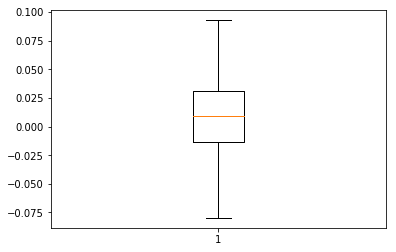

In [15]:
plt.boxplot(dfx['C4'])

{'whiskers': [<matplotlib.lines.Line2D at 0x7fdfb7a1d2b0>,
 'caps': [<matplotlib.lines.Line2D at 0x7fdfb7a1d940>,
 'boxes': [<matplotlib.lines.Line2D at 0x7fdfb7a1d160>],
 'medians': [<matplotlib.lines.Line2D at 0x7fdfb7a1dfd0>],
 'fliers': [<matplotlib.lines.Line2D at 0x7fdfb79d9358>],
 'means': []}

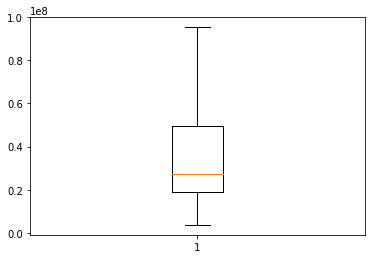

In [16]:
plt.boxplot(dfx['C5'])

{'whiskers': [<matplotlib.lines.Line2D at 0x7fdfb79a6668>,
 'caps': [<matplotlib.lines.Line2D at 0x7fdfb79a6cf8>,
 'boxes': [<matplotlib.lines.Line2D at 0x7fdfb79a6518>],
 'medians': [<matplotlib.lines.Line2D at 0x7fdfb79af3c8>],
 'fliers': [<matplotlib.lines.Line2D at 0x7fdfb79af710>],
 'means': []}

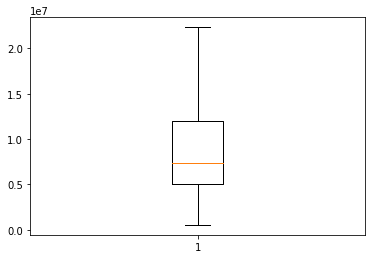

In [17]:
plt.boxplot(dfx['C6'])

{'whiskers': [<matplotlib.lines.Line2D at 0x7fdfb797a7f0>,
 'caps': [<matplotlib.lines.Line2D at 0x7fdfb797ae80>,
 'boxes': [<matplotlib.lines.Line2D at 0x7fdfb797a470>],
 'medians': [<matplotlib.lines.Line2D at 0x7fdfb7983550>],
 'fliers': [<matplotlib.lines.Line2D at 0x7fdfb7983898>],
 'means': []}

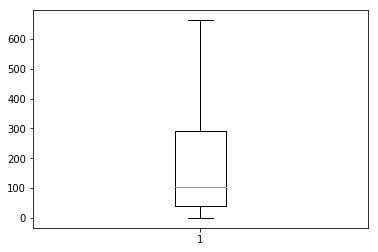

In [18]:
plt.boxplot(dfx['C7'])

{'whiskers': [<matplotlib.lines.Line2D at 0x7fdfb9bb5a90>,
 'caps': [<matplotlib.lines.Line2D at 0x7fdfb9baf128>,
 'boxes': [<matplotlib.lines.Line2D at 0x7fdfb9bb5908>],
 'medians': [<matplotlib.lines.Line2D at 0x7fdfb9baf0b8>],
 'fliers': [<matplotlib.lines.Line2D at 0x7fdfb9bafb38>],
 'means': []}

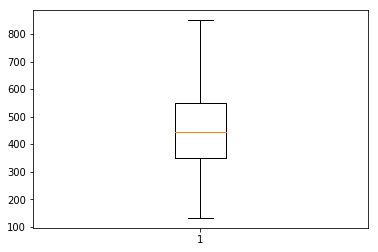

In [19]:
plt.boxplot(dfx['T1'])

{'whiskers': [<matplotlib.lines.Line2D at 0x7fdfb78ad6d8>,
 'caps': [<matplotlib.lines.Line2D at 0x7fdfb78add68>,
 'boxes': [<matplotlib.lines.Line2D at 0x7fdfb78ad588>],
 'medians': [<matplotlib.lines.Line2D at 0x7fdfb78b8438>],
 'fliers': [<matplotlib.lines.Line2D at 0x7fdfb78b8780>],
 'means': []}

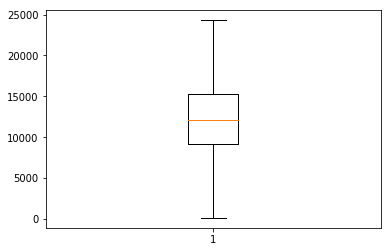

In [20]:
plt.boxplot(dfx['T2'])

{'whiskers': [<matplotlib.lines.Line2D at 0x7fdfb7881e80>,
 'caps': [<matplotlib.lines.Line2D at 0x7fdfb788c550>,
 'boxes': [<matplotlib.lines.Line2D at 0x7fdfb7881d30>],
 'medians': [<matplotlib.lines.Line2D at 0x7fdfb788cbe0>],
 'fliers': [<matplotlib.lines.Line2D at 0x7fdfb788cf28>],
 'means': []}

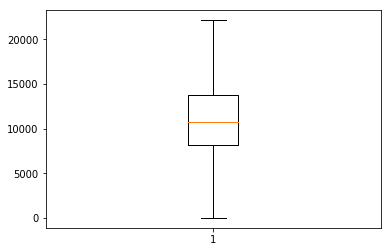

In [21]:
plt.boxplot(dfx['T3'])

{'whiskers': [<matplotlib.lines.Line2D at 0x7fdfb77e0400>,
 'caps': [<matplotlib.lines.Line2D at 0x7fdfb77e0a90>,
 'boxes': [<matplotlib.lines.Line2D at 0x7fdfb77e02b0>],
 'medians': [<matplotlib.lines.Line2D at 0x7fdfb77e7160>],
 'fliers': [<matplotlib.lines.Line2D at 0x7fdfb77e74a8>],
 'means': []}

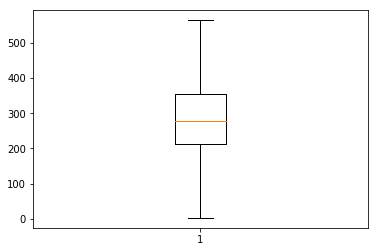

In [22]:
plt.boxplot(dfx['T4'])

{'whiskers': [<matplotlib.lines.Line2D at 0x7fdfb7806390>,
 'caps': [<matplotlib.lines.Line2D at 0x7fdfb77bc278>,
 'boxes': [<matplotlib.lines.Line2D at 0x7fdfb77b3ac8>],
 'medians': [<matplotlib.lines.Line2D at 0x7fdfb77bc908>],
 'fliers': [<matplotlib.lines.Line2D at 0x7fdfb77bcc50>],
 'means': []}

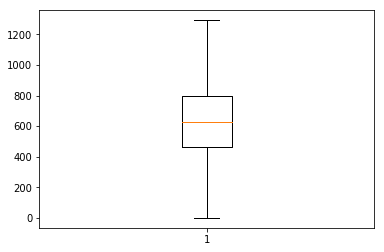

In [23]:
plt.boxplot(dfx['T5'])

{'whiskers': [<matplotlib.lines.Line2D at 0x7fdfb7791978>,
 'caps': [<matplotlib.lines.Line2D at 0x7fdfb7719048>,
 'boxes': [<matplotlib.lines.Line2D at 0x7fdfb7791588>],
 'medians': [<matplotlib.lines.Line2D at 0x7fdfb77196d8>],
 'fliers': [<matplotlib.lines.Line2D at 0x7fdfb7719a20>],
 'means': []}

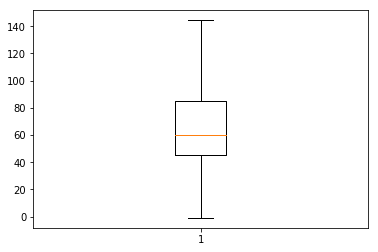

In [24]:
plt.boxplot(dfx['S1'])

{'whiskers': [<matplotlib.lines.Line2D at 0x7fdfb76efb38>,
 'caps': [<matplotlib.lines.Line2D at 0x7fdfb76f9208>,
 'boxes': [<matplotlib.lines.Line2D at 0x7fdfb76ef9e8>],
 'medians': [<matplotlib.lines.Line2D at 0x7fdfb76f9898>],
 'fliers': [<matplotlib.lines.Line2D at 0x7fdfb76f9be0>],
 'means': []}

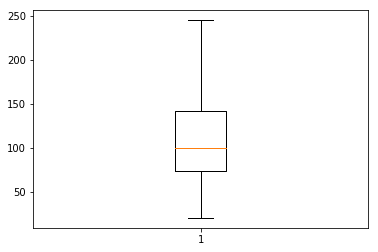

In [25]:
plt.boxplot(dfx['S2'])

{'whiskers': [<matplotlib.lines.Line2D at 0x7fdfb76c3f98>,
 'caps': [<matplotlib.lines.Line2D at 0x7fdfb76cd668>,
 'boxes': [<matplotlib.lines.Line2D at 0x7fdfb76c3e48>],
 'medians': [<matplotlib.lines.Line2D at 0x7fdfb76cdd30>],
 'fliers': [<matplotlib.lines.Line2D at 0x7fdfb76570b8>],
 'means': []}

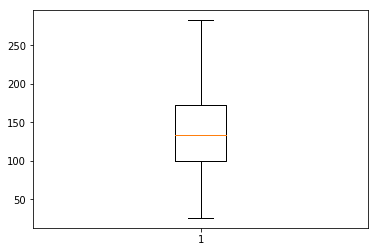

In [26]:
plt.boxplot(dfx['S3'])

In [27]:
# concat dfx dataframe and dfbinary dataframe to create the full x-variable dataframe 
dfx = pd.concat([dfx, dfbinary], axis=1)
dfx.head()

,C1,C3,C4,C5,C6,C7,T1,T2,T3,T4,T5,S1,S2,S3,C5p,C2,C3p
0,122.000,2.225,0.029074,40962052.0,10600000.0,51.345,470.0,12719.0,11560.0,301.0,690.0,62.0,117.0,139.0,3.864345,1.0,0
1,254.375,-1.620,-0.013352,28869196.0,2400000.0,25.936,791.0,21792.0,19585.0,510.0,1120.0,71.0,242.0,237.0,7.882541,0.0,1
2,90.000,-1.240,0.020715,16845668.0,5000000.0,7.378,201.0,5262.0,4785.0,128.0,325.0,61.0,33.0,60.0,3.369134,1.0,1
3,209.000,-0.910,0.020023,14848637.0,4500000.0,8.526,328.0,8259.0,7574.0,177.0,509.0,80.0,59.0,110.0,3.299697,1.0,1
4,80.000,0.070,-0.034895,30741716.0,8250000.0,632.298,572.0,14830.0,13176.0,336.0,720.0,67.0,149.0,167.0,3.726269,1.0,0


In [28]:
# export the new csv file to use in normalization using min/max scaler 
dfx.to_csv('../csv_files/p1iqr.csv')